# OBJETIVO DO PROJETO

O objetivo deste projeto é criar um algoritmo de analise quantitativa de dados que permita o usuário oferecer informações sobre ciclos de mercado para ativos listados na B3, possibilitando o mesm identificar ou não oportunidades de negócio.


Crie um código em python que busca o ativo digitado pelo usuário, por nome ou código de listagem do mesmo, depois utilize a biblioteca yfinance para pesquisa os dados de fechamento do ativo nos ultimos 5 anos e, em seguida, crie um dataframe com dos dados obtidos, a partir dele gera um gráfico do tipo candlestick.

 ## Definição dos Requisitos
 Os requisitos funcionais básicos para este projeto
são:

*   Captura do Ativo
*   Validação do Ativo
*   Geração Dataframe
*   Geração de Gráfico de Candlestick




In [29]:
!pip install yfinance pandas mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00


Função de gráfico candlestick
Função mapa de calor
Função taxaSelic
Função decomposição em série


Digite o ativo(Ex. PETR4 ou PETROBRAS): mglu3
Digite o período de tempo (Ex. 1y, 6mo, 3mo): 
Digite o período para o cálculo do RSI (21 dias): 5


[*********************100%***********************]  1 of 1 completed


Ativo encontrado: Magazine Luiza (MGLU3)


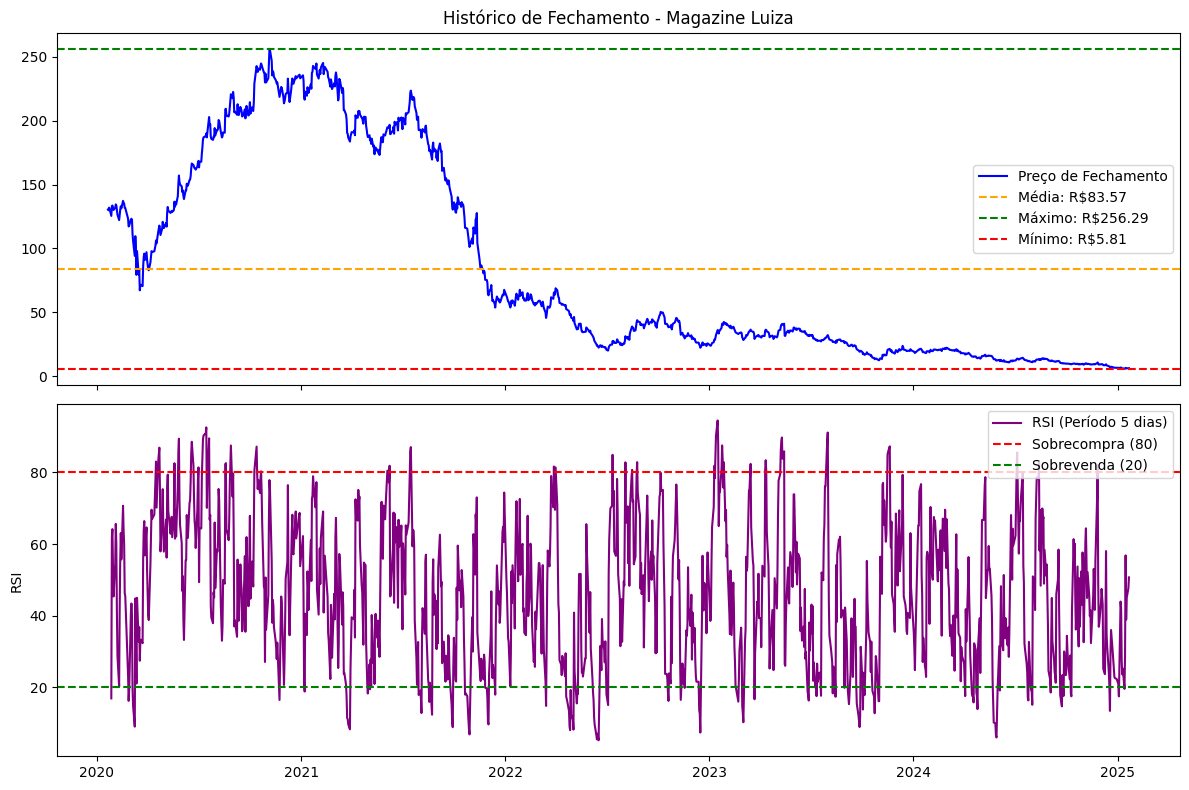

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from typing import Dict

# ================================
# Configuração de ativos
# ================================
ativos_b3 = {
    "GOAU4": {"nome": "Gerdau", "setor": "Construção", "tipo": "Ação Preferencial", "code": "GOAU4"},
    "PETR4": {"nome": "Petrobras", "setor": "Petróleo, Gás e Biocombustíveis", "tipo": "Ação Preferencial", "code": "PETR4"},
    "PETR3": {"nome": "Petrobras", "setor": "Petróleo, Gás e Biocombustíveis", "tipo": "Ação Ordinária", "code": "PETR3"},
    "VALE3": {"nome": "Vale", "setor": "Mineração", "tipo": "Ação Ordinária", "code": "VALE3"},
    "GOLL4": {"nome": "GOL", "setor": "Consumo", "tipo": "Ação Preferencial", "code": "GOLL4"},
    "ITUB4": {"nome": "Itaú Unibanco", "setor": "Financeiro", "tipo": "Ação Preferencial", "code": "ITUB4"},
    "MGLU3": {"nome": "Magazine Luiza", "setor": "Consumo", "tipo": "Ação Ordinária", "code": "MGLU3"},
    "BBDC4": {"nome": "Bradesco", "setor": "Financeiro", "tipo": "Ação Preferencial", "code": "BBDC4"},
    "BBDC3": {"nome": "Bradesco", "setor": "Financeiro", "tipo": "Ação Ordinária", "code": "BBDC3"},
    "ABEV3": {"nome": "Ambev", "setor": "Bebidas", "tipo": "Ação Ordinária", "code": "ABEV3"},
    "WEGE3": {"nome": "WEG", "setor": "Bens Industriais", "tipo": "Ação Ordinária", "code": "WEGE3"},
    "ITSA4": {"nome": "Itausa", "setor": "Bens Industriais", "tipo": "Ação Preferencial", "code": "ITSA4"},
    "B3SA3": {"nome": "B3", "setor": "Bens Industriais", "tipo": "Ação Ordinária", "code": "B3SA3"},
    "BBAS3": {"nome": "Banco do Brasil", "setor": "Financeiro", "tipo": "Ação Ordinária", "code": "BBAS3"},
    "BBSE3": {"nome": "BB Seguridade", "setor": "Financeiro", "tipo": "Ação Ordinária", "code": "BBSE3"},
    "CMIG4": {"nome": "CEMIG", "setor": "Energia", "tipo": "Ação Preferencial", "code": "CMIG4"},
    "TAEE4": {"nome": "Taesa", "setor": "Construção", "tipo": "Ação Preferencial", "code": "TAEE4"},
    "LREN3": {"nome": "Lojas Renner", "setor": "Consumo", "tipo": "Ação Ordinária", "code": "LREN3"},
    "XPLG11": {"nome": "XP Logistica", "setor": "Logística", "tipo": "Fundo Imobiliário de Investimento", "code": "XPLG11"},
    "XPML11": {"nome": "XP MALL", "setor": "Logística", "tipo": "Fundo Imobiliário de Investimento", "code": "XPML11"},
    "VISC11": {"nome": "VISCONDE", "setor": "Logística", "tipo": "Fundo Imobiliário de Investimento", "code": "VISC11"},
    "BTLG11": {"nome": "BTG Pactual", "setor": "Logística", "tipo": "Fundo Imobiliário de Investimento", "code": "BTLG11"},
    "KNCR11": {"nome": "Kinea Rendimentos", "setor": "Papéis", "tipo": "Fundo Imobiliário de Investimento", "code": "KNCR11"},
    "CXSE3": {"nome": "Cxi Seguridade", "setor": "Financeiro", "tipo": "Ação Ordinária", "code": "CXSE3"},
}

# ================================
# Funções de análise
# ================================
def show_data(ticker: str, periodo: str = "1y", intervalo: str = "1d") -> pd.DataFrame:
    """Baixa os dados históricos de um ativo."""
    try:
        return yf.download(ticker, period=periodo, interval=intervalo)
    except Exception as e:
        print(f"Erro ao baixar dados para {ticker}: {e}")
        return pd.DataFrame()

def calcular_rsi(df: pd.DataFrame, coluna: str, period: int = 21) -> pd.Series:
    """Calcula o Índice de Força Relativa (RSI)."""
    rsi = RSIIndicator(df[coluna], window=period)
    return rsi.rsi()

def plotar_fechamento_com_rsi(df: pd.DataFrame, nome_ativo: str, periodo_rsi: int):
    """Plota gráficos de fechamento e RSI."""
    try:
        preco_medio = df['Fechamento'].mean()
        preco_maximo = df['Fechamento'].max()
        preco_minimo = df['Fechamento'].min()

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

        # Gráfico de Fechamento
        ax1.plot(df['Data'], df['Fechamento'], label='Preço de Fechamento', color='blue')
        ax1.axhline(preco_medio, color='orange', linestyle='--', label=f'Média: R${preco_medio:.2f}')
        ax1.axhline(preco_maximo, color='green', linestyle='--', label=f'Máximo: R${preco_maximo:.2f}')
        ax1.axhline(preco_minimo, color='red', linestyle='--', label=f'Mínimo: R${preco_minimo:.2f}')
        ax1.set_title(f"Histórico de Fechamento - {nome_ativo}")
        ax1.legend()

        # Gráfico do RSI
        ax2.plot(df['Data'], df['RSI'], label=f'RSI (Período {periodo_rsi} dias)', color='purple')
        ax2.axhline(80, linestyle='--', color='red', label='Sobrecompra (80)')
        ax2.axhline(20, linestyle='--', color='green', label='Sobrevenda (20)')
        ax2.set_ylabel("RSI")
        ax2.legend()

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Erro ao plotar gráficos: {e}")

# ================================
# Função principal de busca
# ================================
def buscar_ativo(dicionario: Dict):
    """Busca um ativo no dicionário e realiza análises com base nos dados históricos."""
    termo = input("Digite o ativo(Ex. PETR4 ou PETROBRAS): ").strip().upper()
    periodo = input("Digite o período de tempo (Ex. 1y, 6mo, 3mo): ").strip()
    periodo = periodo if periodo else "5y"  # Definindo o período padrão como "5y"

    # Entrada do usuário para o período do RSI (padrão 21)
    periodo_rsi = input("Digite o período para o cálculo do RSI (14 dias): ").strip()
    periodo_rsi = int(periodo_rsi) if periodo_rsi else 14  # Se o usuário não informar, o valor padrão será 21

    for ticker, info in dicionario.items():
        if termo in [info['code'].upper(), info['nome'].upper()]:
            print(f"\nAtivo encontrado: {info['nome']} ({info['code']})")
            ticker_yf = info['code'] + ".SA"

            dados = show_data(ticker_yf, periodo=periodo)
            if dados.empty:
                print("Não foi possível obter dados históricos para este ativo.")
                return

            df = dados.reset_index()
            df['Data'] = pd.to_datetime(df['Date'])
            df['Fechamento'] = df['Close']
            df['RSI'] = calcular_rsi(df, coluna='Fechamento', period=periodo_rsi)

            plotar_fechamento_com_rsi(df, info['nome'], periodo_rsi)
            return

    print("Ativo não encontrado. Tente novamente.")

# ================================
# Execução
# ================================
if __name__ == "__main__":
    buscar_ativo(ativos_b3)
